In [1]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rasterio.plot import show
import seaborn as sns

In [2]:
#depth_src = rasterio.open('../depth_dDEMs/clpx/corrected/clpx_depth_101_2017_corrected_0.43_m.tif')
#depth_src = rasterio.open('../depth_dDEMs/clpx/corrected/clpx_depth_098_2015_corrected_0.37_m.tif')
depth_src = rasterio.open('../depth_dDEMs/clpx/uncorrected/clpx_depth_101_2017.tif')
#depth_src = rasterio.open('../depth_dDEMs/clpx/uncorrected/clpx_depth_098_2015.tif')

depth = depth_src.read(1)
del depth_src

In [3]:
ortho_src = rasterio.open('../orthos/clpx/mosaics/clpx_ortho_04_11_2017.tif')
#ortho_src = rasterio.open('../orthos/clpx/mosaics/clpx_ortho_04_08_2015.tif')
ortho = ortho_src.read()
del ortho_src
rgb = ortho[0:3]
del ortho
rgb.shape

(3, 11100, 13750)

In [4]:
ortho = np.sum(rgb, axis=0)

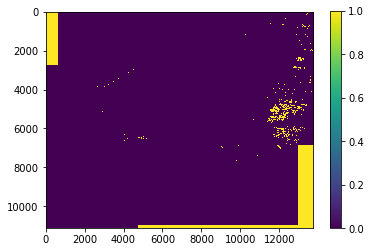

In [5]:
rock_pixels = (ortho < 100)
plt.imshow(rock_pixels)
plt.colorbar()

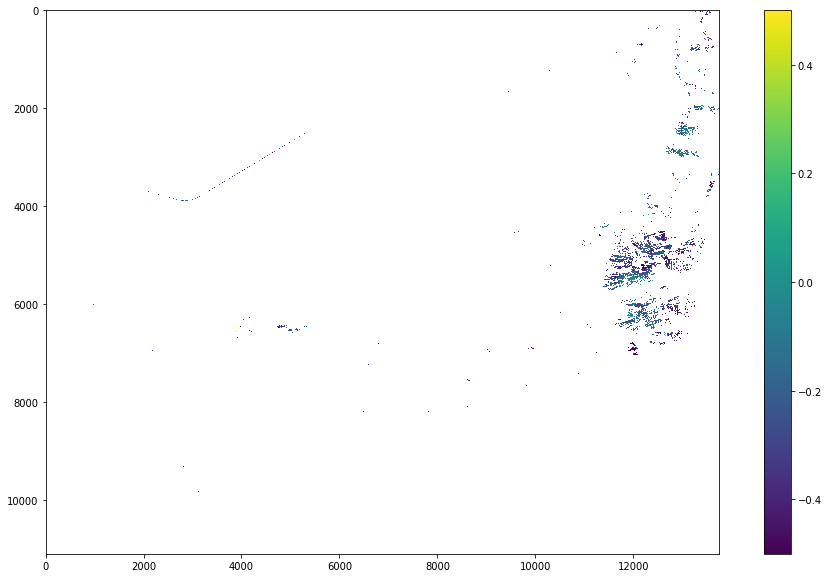

In [6]:
rock_x_depth = rock_pixels * depth
rock_x_depth[rock_x_depth < -100] = np.nan
rock_x_depth[rock_x_depth == 0.0] = np.nan
plt.figure(figsize=(16,10))
plt.imshow(rock_x_depth, vmin=-0.5, vmax=0.5)
plt.colorbar()
#depth[depth == -9999] = np.nan
#brown_x_depth = brown * depth
#brown_x_depth[brown_x_depth == -9999] = np.nan
#del depth
#del brown
#del ortho

In [7]:
np.nanmean(rock_x_depth)

-0.26724964

In [ ]:
np.nanmedian(rock_x_depth)

In [ ]:
np.nanstd(rock_x_depth)

In [ ]:
s = pd.Series((rock_x_depth.flatten()))
s.size

In [ ]:
s_dropnan = s.dropna()
s_dropnan.size

In [ ]:
s_dropnan.size / s.size

In [ ]:
s_dropnan_0 = s_dropnan[s_dropnan != 0]

In [ ]:
s_dropnan_0.size / s_dropnan.size

In [ ]:
s_dropnan_0.plot()

In [ ]:
sns.distplot(s_dropnan, bins = 30)
#plt.xlim(-2.5, 2.5)

In [ ]:
s_dropnan_0.median()

In [ ]:
s = pd.Series([1,0,1,0,1])
s[s==0]

In [ ]:
s.nonzero()
#s.iloc[[s.nonzero()]]

In [ ]:
s[~s.iloc[s.nonzero()]]